In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [4]:
#Ticker symbols for the pharma companys
ticker = ['PFE', 'JNJ', 'MRK', 'ABBV']

In [5]:
start_date = '2018-08-18'
end_date = '2023-08-17'

In [6]:
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%***********************]  4 of 4 completed


In [7]:
data.head()

Adj Close                                        Close  \
                 ABBV         JNJ        MRK        PFE       ABBV   
Date                                                                 
2018-08-20  77.244492  119.819366  57.467487  33.361450  97.629997   
2018-08-21  77.331512  118.480057  56.648518  33.227463  97.739998   
2018-08-22  77.252411  117.832291  56.542046  33.156532  97.639999   
2018-08-23  76.864708  118.269974  56.484707  33.258991  97.150002   
2018-08-24  77.062500  119.005280  56.542046  33.416615  97.400002   

                                                    High              ...  \
                   JNJ        MRK        PFE        ABBV         JNJ  ...   
Date                                                                  ...   
2018-08-20  136.880005  66.956108  40.161289  100.230003  137.119995  ...   
2018-08-21  135.350006  66.001907  40.000000   98.050003  137.429993  ...   
2018-08-22  134.610001  65.877861  39.914612   98.320000  135.679993  ...   
2018-08-23  135.110001  65.811066  40.037952   97.849998  135.490005  ...   
2018-08-24  135.949997  65.877861  40.227703   97.589996  136.149994  ...   

                  Low                  Open                                    \
                  MRK        PFE       ABBV         JNJ        MRK        PFE   
Date                                                                            
2018-08-20  65.772903  39.933586  99.330002  134.929993  65.839699  40.037952   
2018-08-21  65.925575  39.838711  97.860001  137.000000  66.994278  40.161289   
2018-08-22  65.696564  39.667931  97.839996  135.559998  66.011452  39.990513   
2018-08-23  65.591606  39.810246  97.690002  134.610001  65.715652  39.952560   
2018-08-24  65.620232  39.848198  97.139999  135.110001  65.839699  40.256168   

             Volume                               
               ABBV      JNJ       MRK       PFE  
Date                                              
2018-08-20  6172500  7935000  10919426  22521029  
2018-08-21  3528400  5832100  10285701  18633244  
2018-08-22  2963300  4688400   6176178  15001687  
2018-08-23  2137500  5057600   5806654  21032148  
2018-08-24  2996100  4809400   5194098  21661703  

[5 rows x 24 columns]

## Closing Price

Closing price against data, for each company

In [8]:
   plt.figure(figsize = (12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

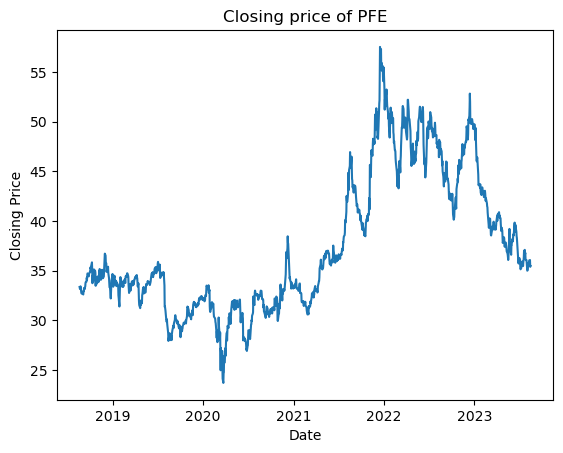

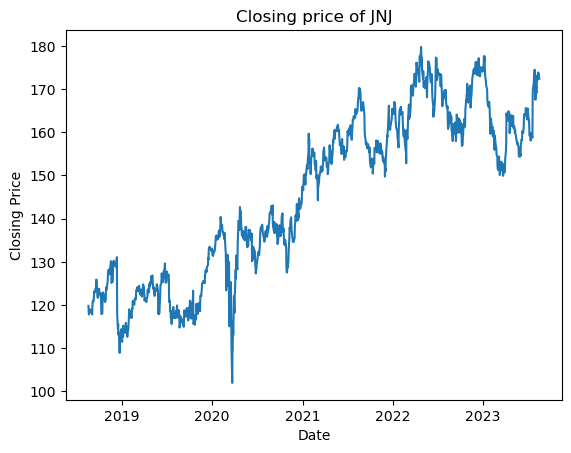

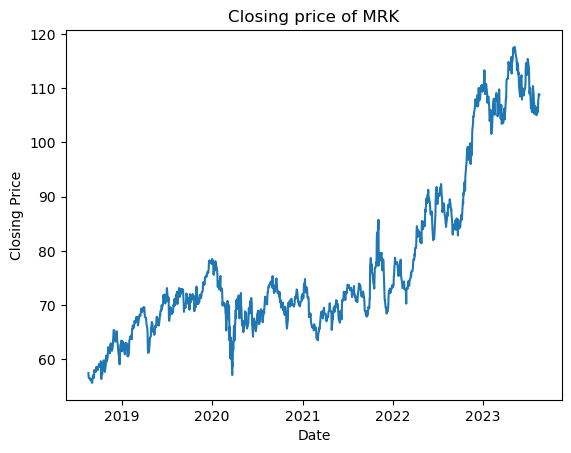

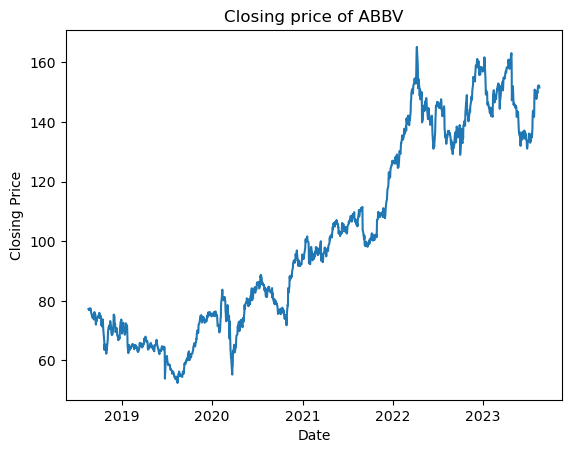

In [9]:
for tickers in ticker: 
    plt.plot(data.index, data['Adj Close', tickers])
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title(f'Closing price of {tickers}')
    plt.show()

## Volume of Sales

Showcasing the change of volume over a period of time. 

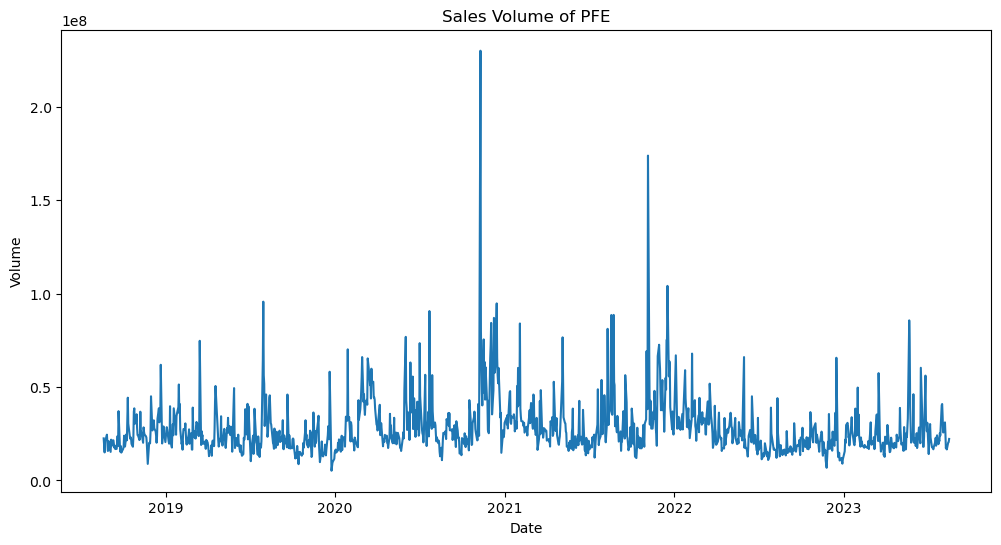

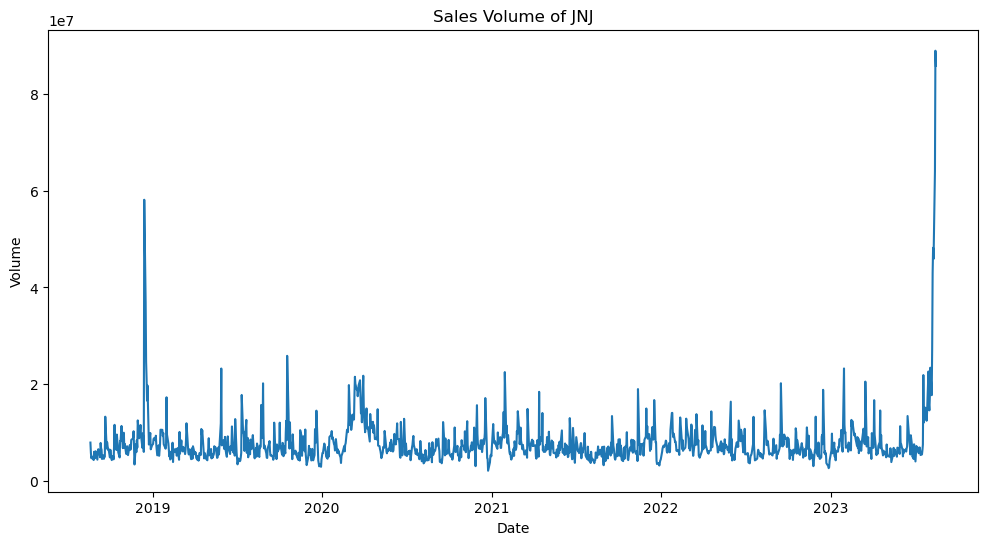

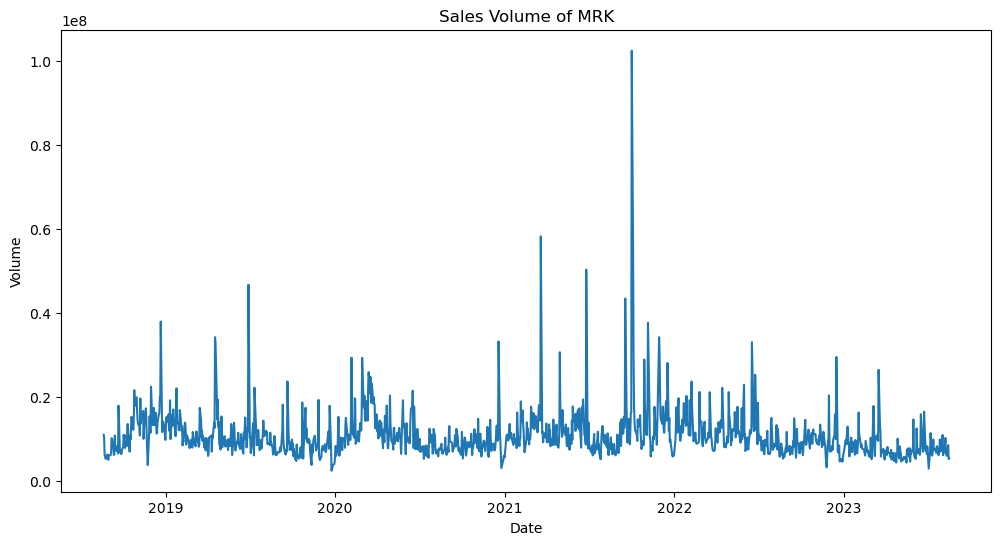

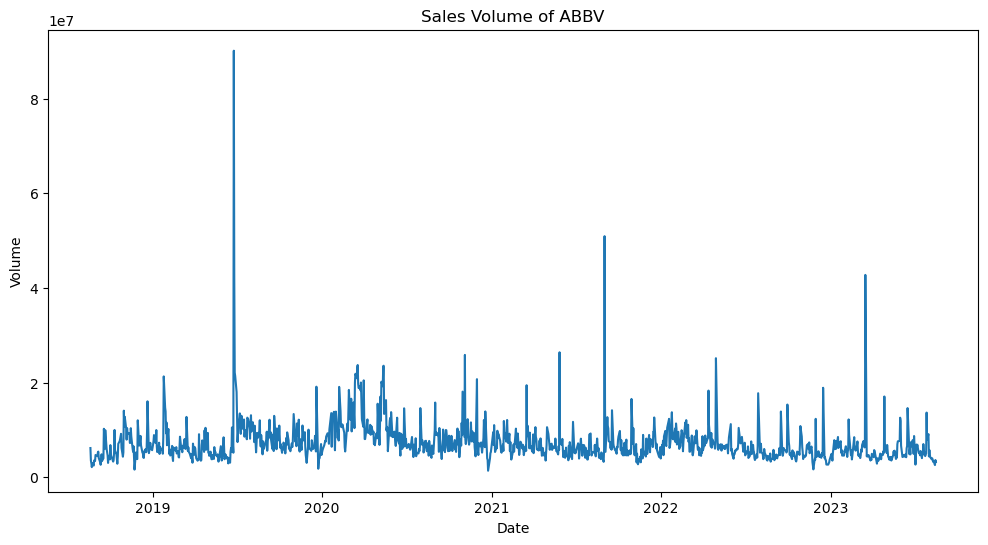

In [10]:
for tickers in ticker:
    plt.figure(figsize = (12,6))
    plt.plot(data.index, data['Volume', tickers])
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.title(f'Sales Volume of {tickers}')
    plt.show()

## Moving Average

Moving Average is a simple technical analysis tools that smooths out the price data.

In [11]:
#Calculating moving averages 
window_sizes = [10, 20, 50]

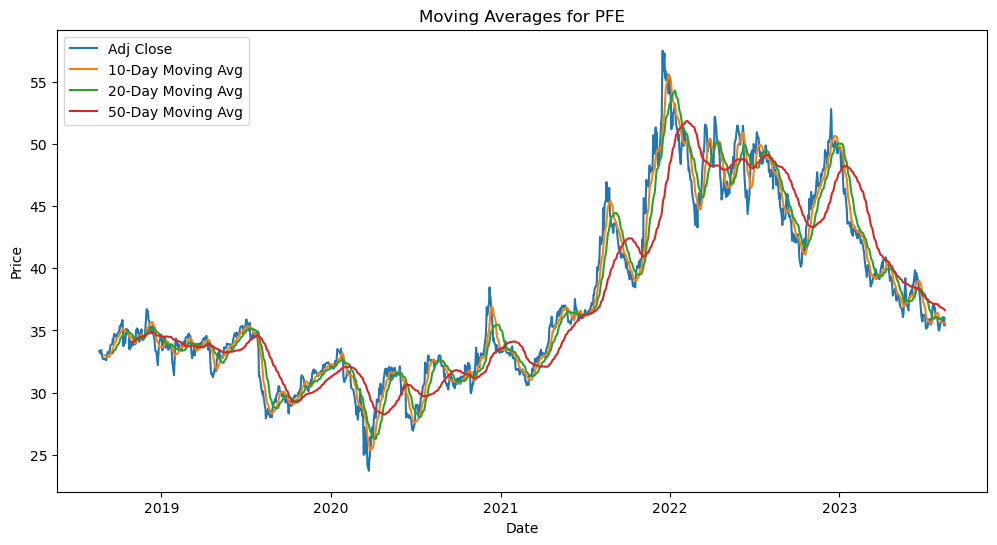

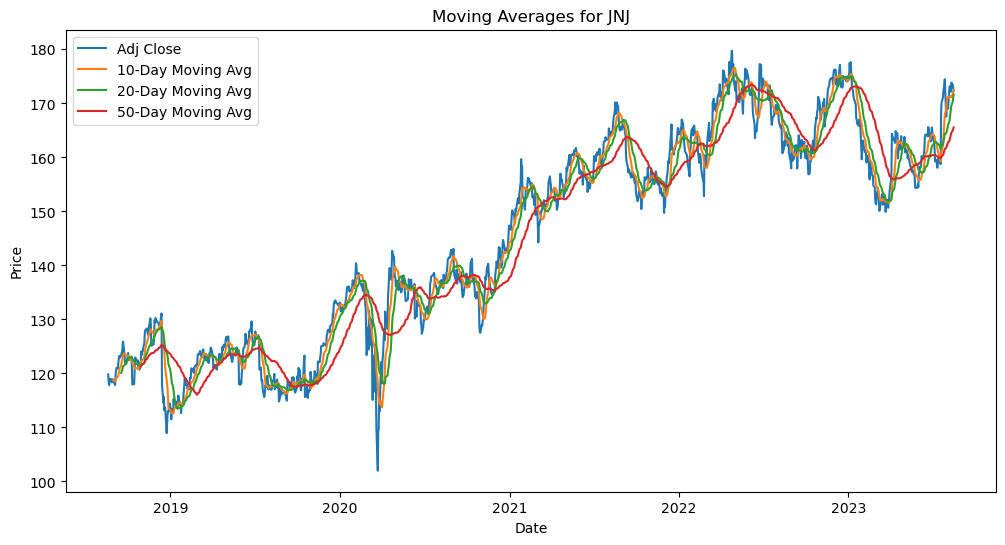

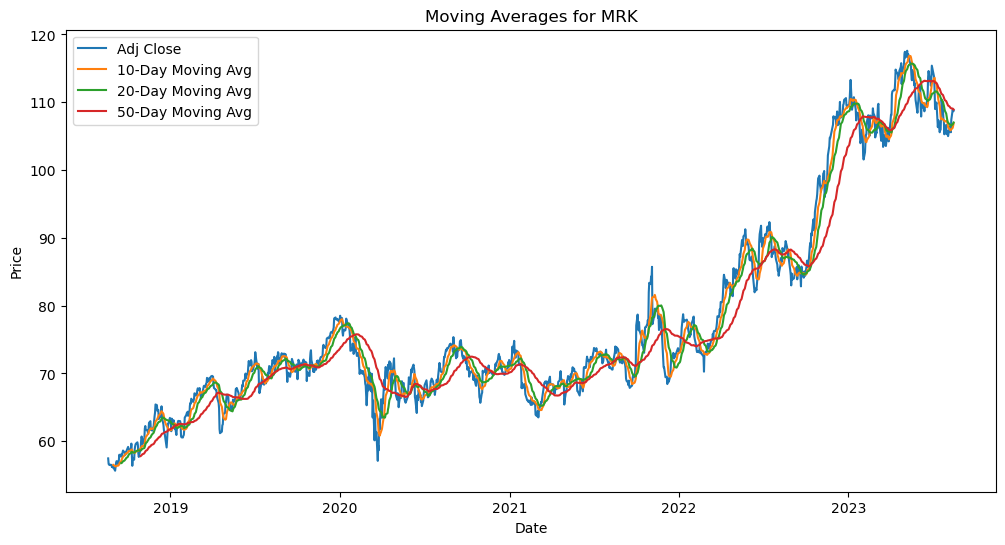

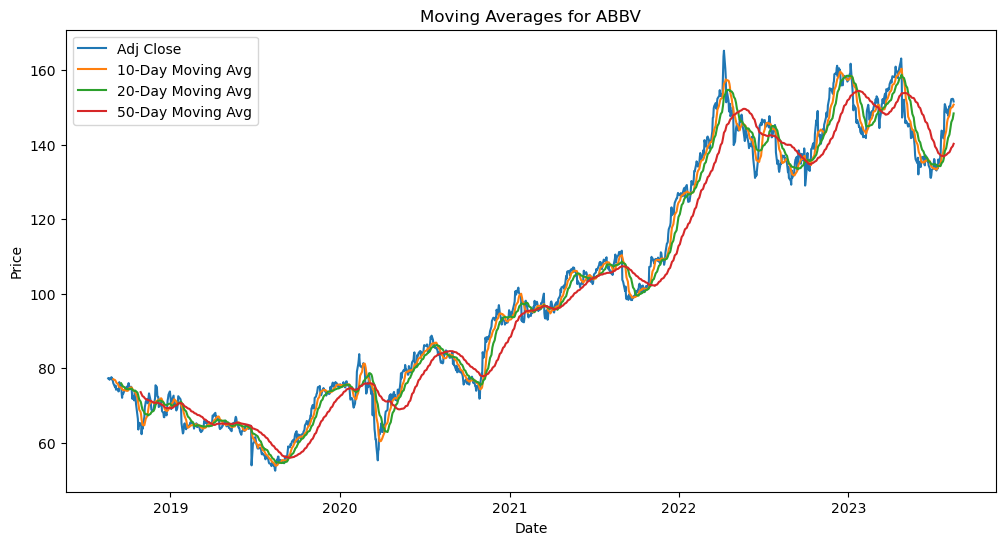

In [12]:
for tickers in ticker:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Adj Close', tickers], label='Adj Close') 

    # Plotting the moving averages
    for window_size in window_sizes:
        moving_average = data['Adj Close', tickers].rolling(window=window_size).mean()
        plt.plot(data.index, moving_average, label=f'{window_size}-Day Moving Avg')
    
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Moving Averages for {tickers}')
    plt.legend()
    plt.show()


## Daily Return of the Stock Exchange

Analysing the risk of the the stock, by observing the daily changes of the stock
To do this, going to look at the pct change of the Adj Close

In [13]:
percentage_changes = data['Adj Close'].pct_change()

<Figure size 1200x600 with 0 Axes>

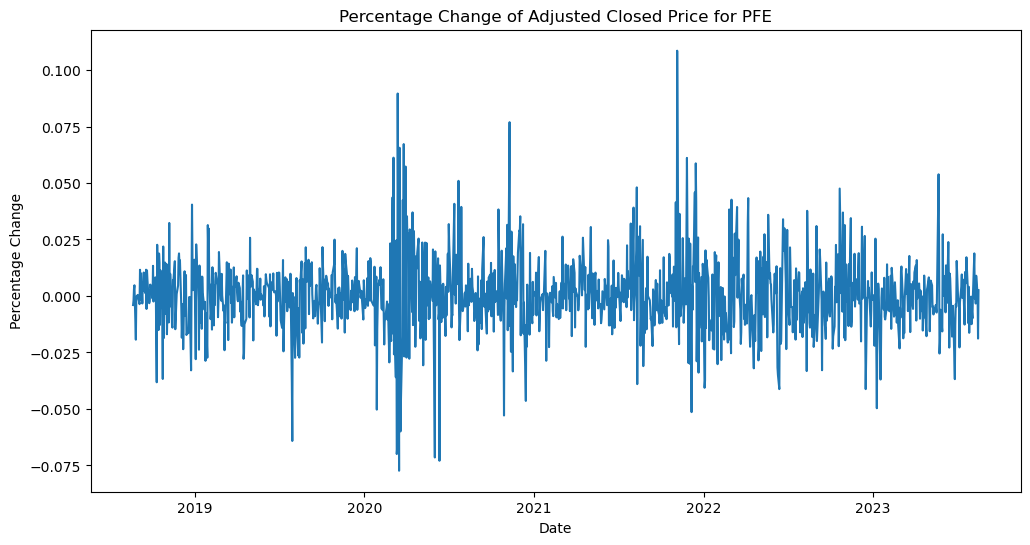

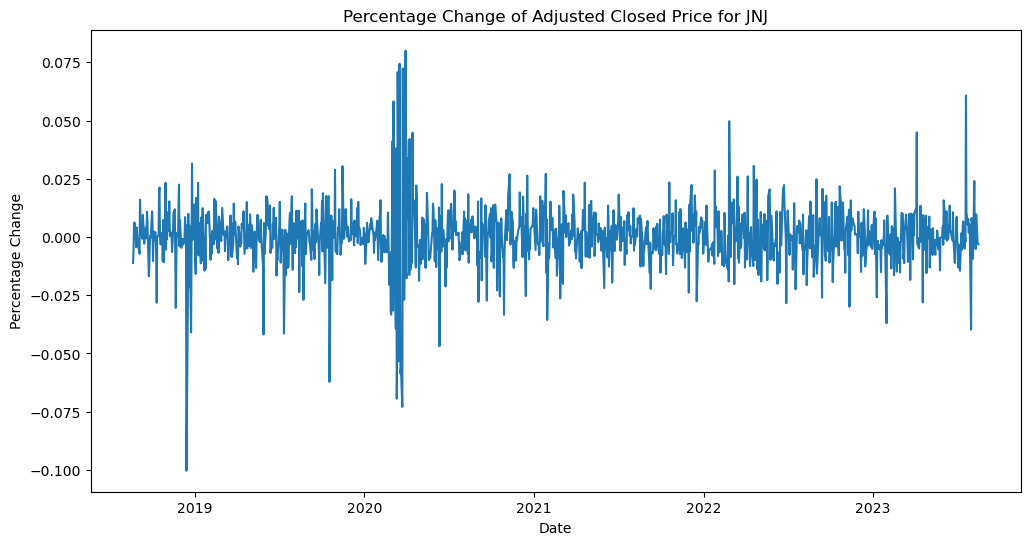

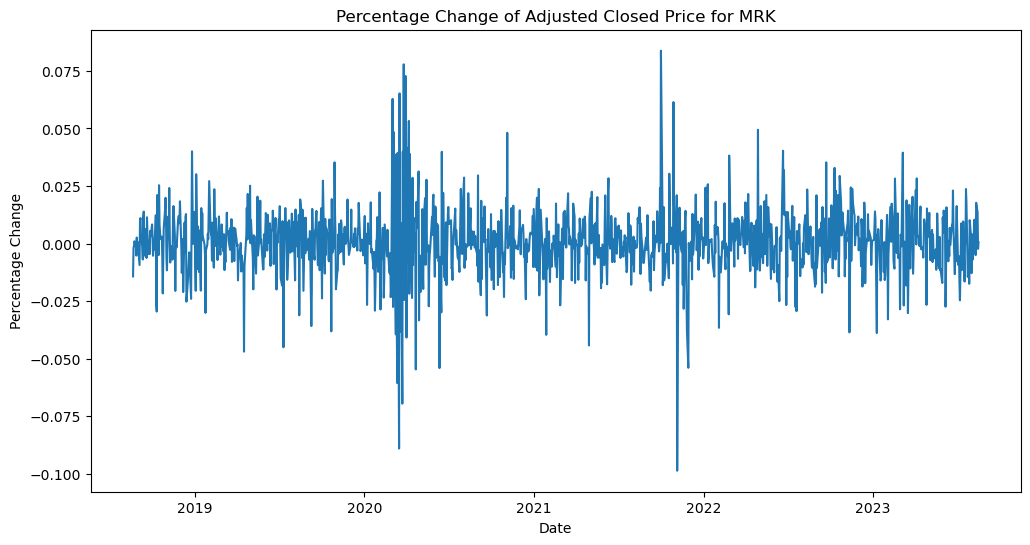

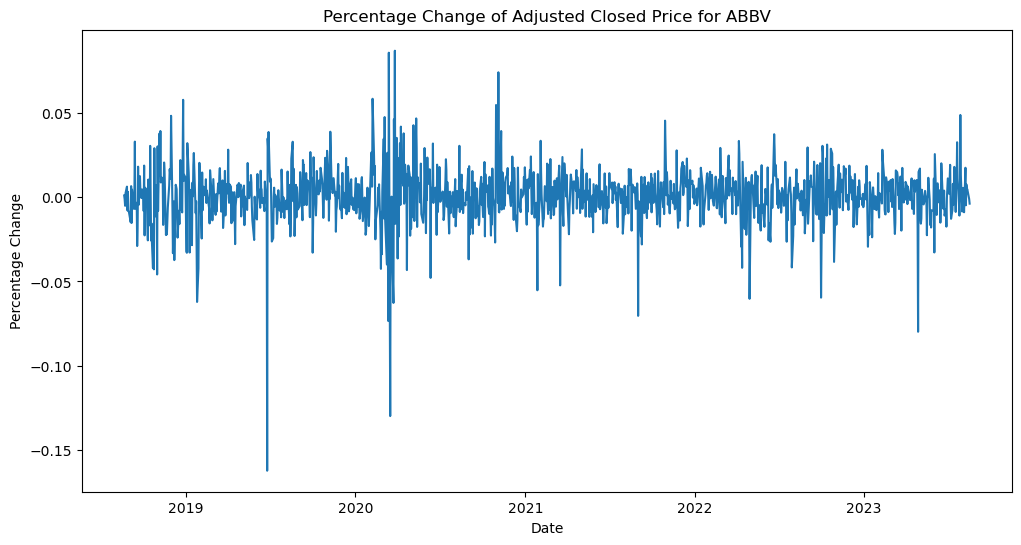

In [14]:
plt.figure(figsize = (12,6))

for tickers in ticker:
    plt.figure(figsize = (12,6))
    plt.plot(percentage_changes.index, percentage_changes[tickers])
    plt.xlabel('Date')
    plt.ylabel('Percentage Change')
    plt.title(f'Percentage Change of Adjusted Closed Price for {tickers}')
    plt.show()


<Figure size 1200x900 with 0 Axes>

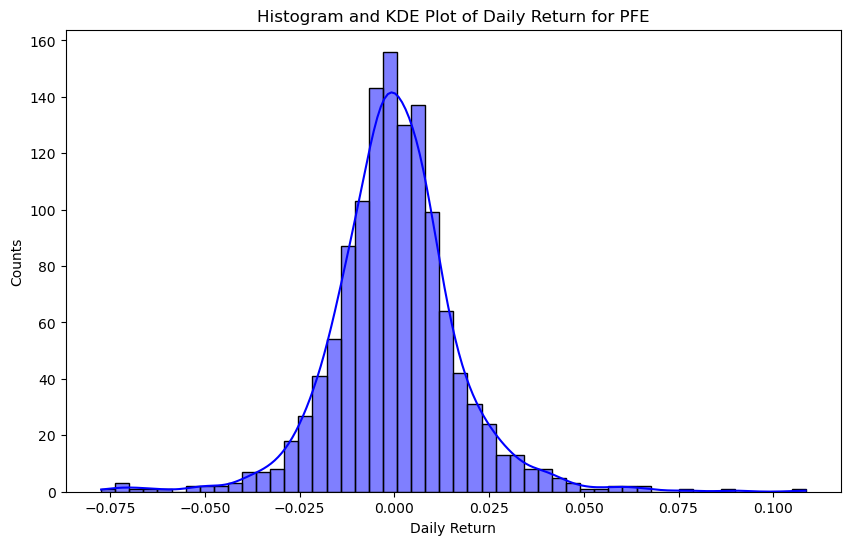

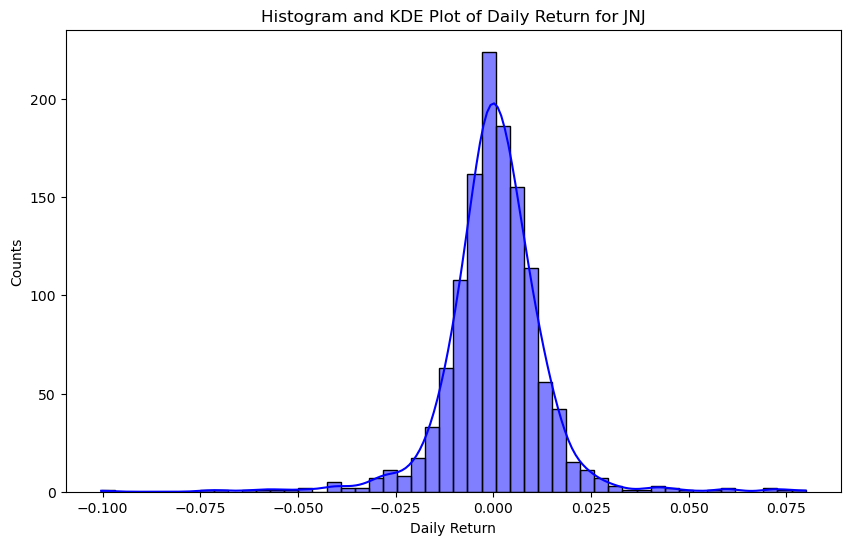

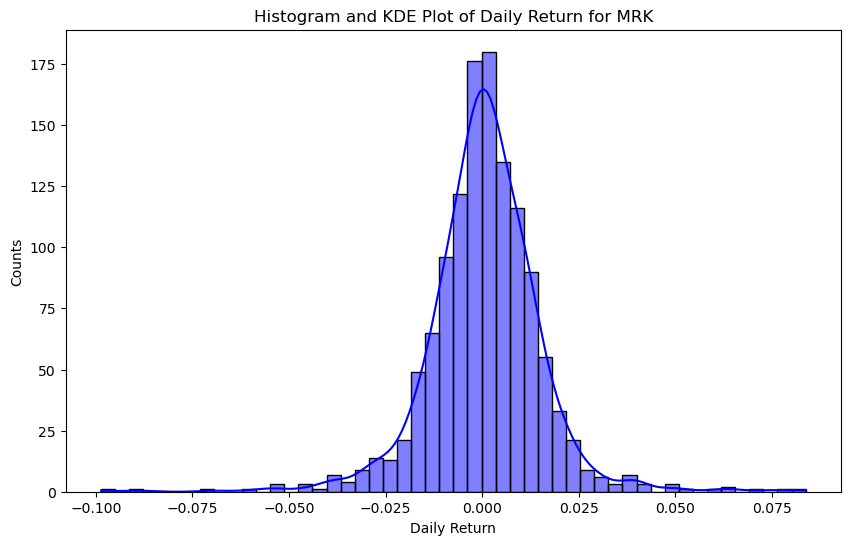

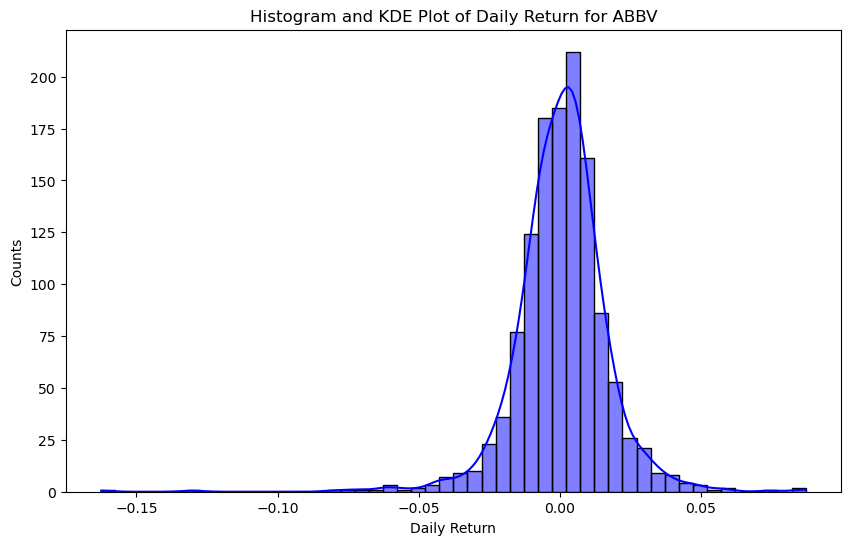

In [15]:
# Calculate average daily return
average_daily_return = percentage_changes.mean()

# Create a figure with a 2x2 grid of histograms
plt.figure(figsize=(12, 9))

for i, tickers in enumerate(ticker):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=percentage_changes[tickers], bins=50, kde=True, color='blue')
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'Histogram and KDE Plot of Daily Return for {tickers}')
    plt.show()

## Correlation beween different Stocks Closing Prices

In [16]:
percentage_changes = data['Adj Close'].pct_change()

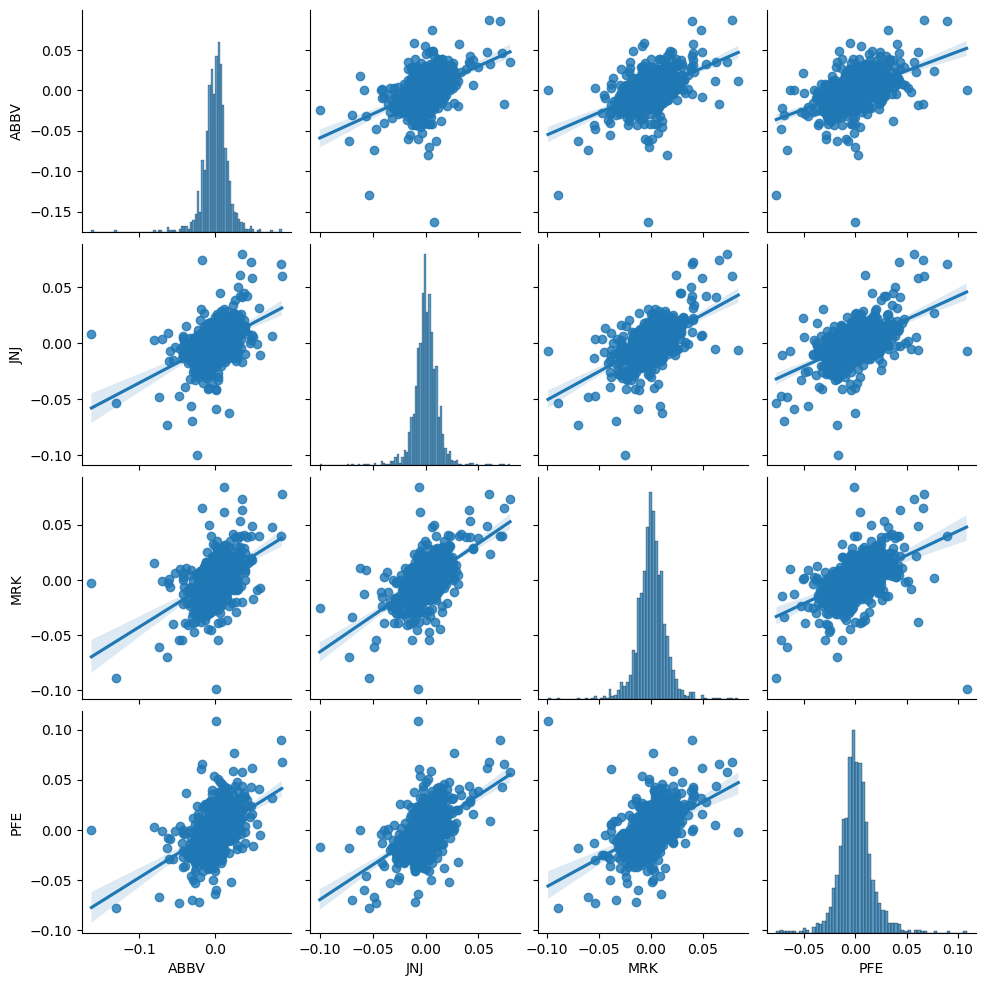

In [17]:
sns.pairplot(percentage_changes.dropna(), kind = 'reg')

There are a correlation between MPK and JNJ

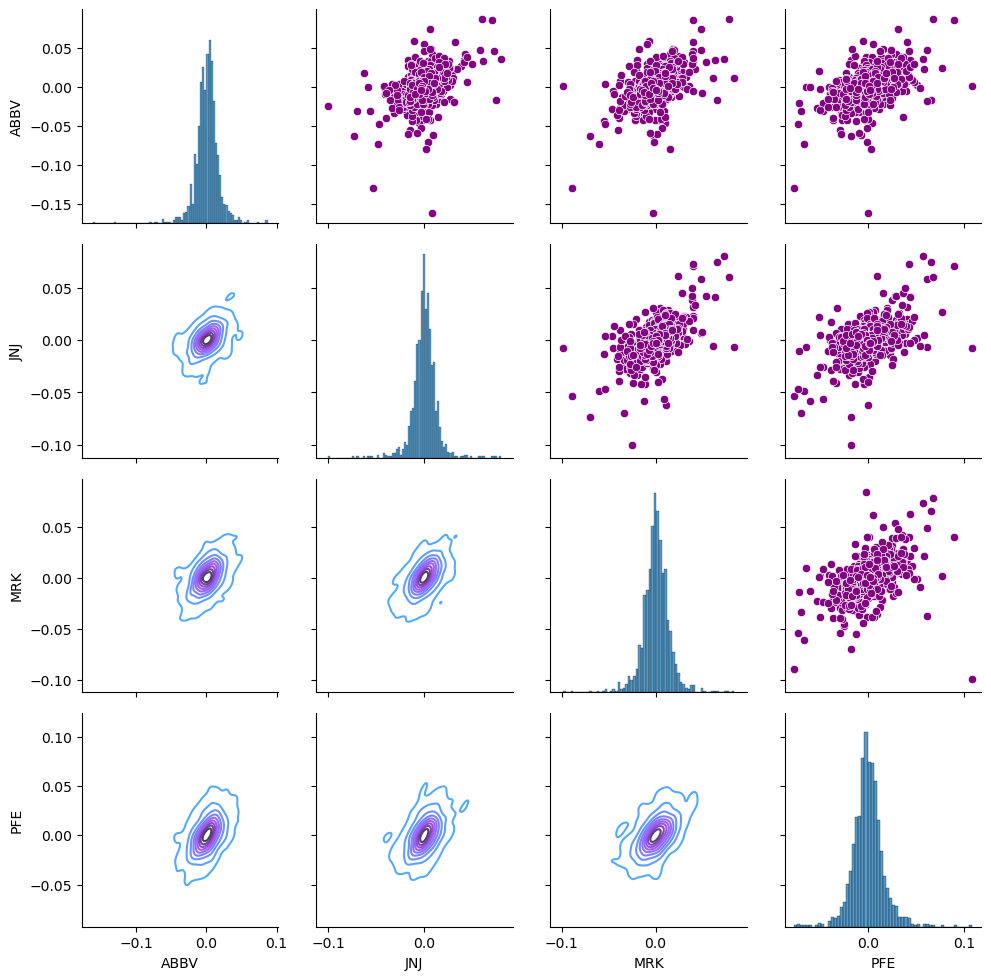

In [18]:
grid = sns.PairGrid(percentage_changes.dropna())
grid.map_upper(sns.scatterplot, color = 'purple')
grid.map_lower(sns.kdeplot, cmap = 'cool_d')
grid.map_diag(sns.histplot, kde_kws={'color': 'k'})

In [19]:
percentage_changes = data['Adj Close'].pct_change()
daily_returns = data['Adj Close'].diff()

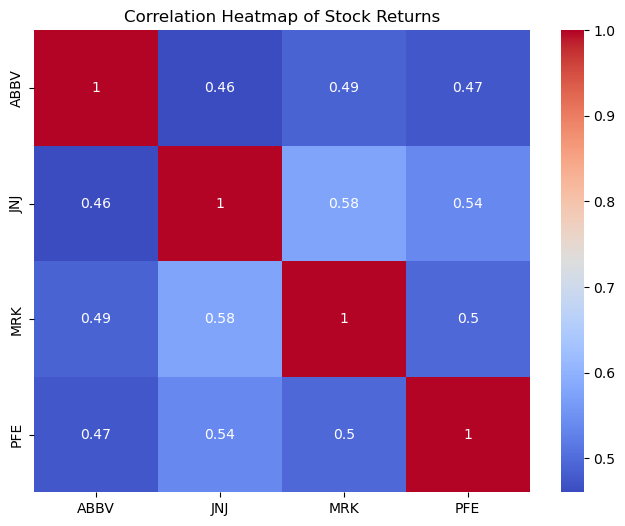

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(percentage_changes.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Returns')
plt.show()

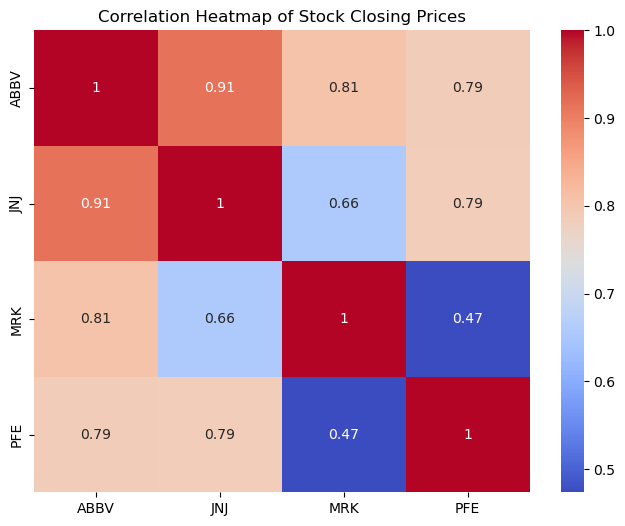

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(data['Adj Close'].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Stock Closing Prices')
plt.show()

Heatmaps give a numerical visualisation of the correlation.
As suspected MRK and JNJ are mostly correlated

## Risk by Investing in a Particular Stock

In [22]:
rets = percentage_changes.dropna()

In [23]:
#Calculating the area of the scatter marker
area = np.pi*20

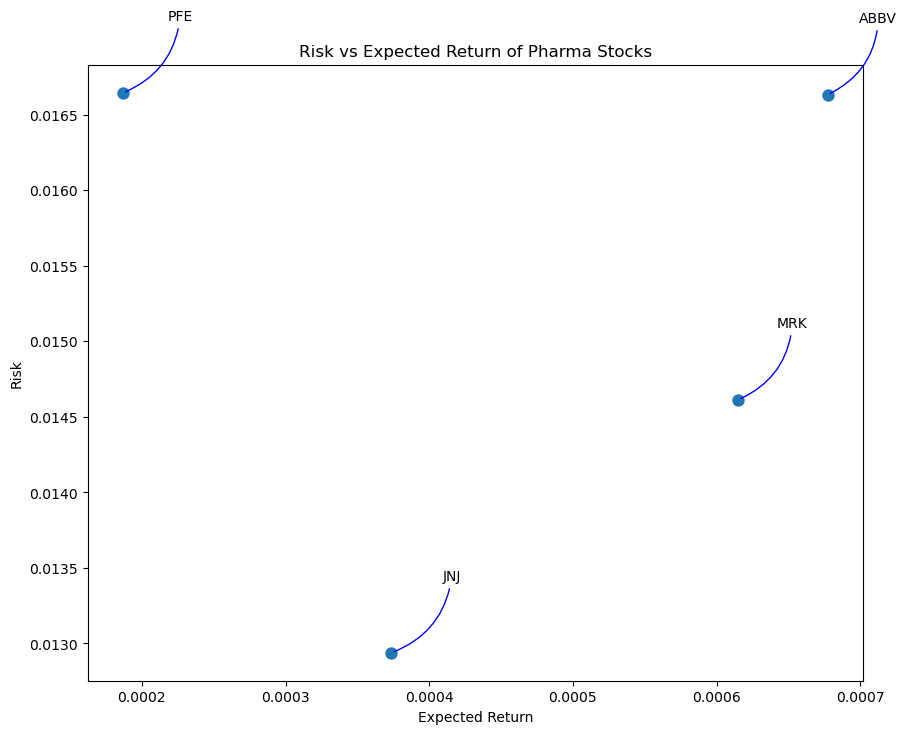

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')
for label, x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50,50), textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', color='blue',
    connectionstyle = 'arc3, rad = -0.3'))
plt.title('Risk vs Expected Return of Pharma Stocks')
plt.show()

JNJ has a moderate return but very low risk
MRK, very high return as compared to JNJ, moderate risk
ABBV has a very high expected return aD very high risk

## Predicting the closing Price Stock of JNJ 

In [25]:
ticker_symbol = 'JNJ'


In [26]:
start_date = '2018-08-18'
end_date = '2023-08-17'



In [27]:
JNJ = yf.download(ticker_symbol, start = start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [28]:
JNJ.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-20,134.929993,137.119995,134.000000,136.880005,119.819359,7935000
2018-08-21,137.000000,137.429993,135.300003,135.350006,118.480064,5832100
2018-08-22,135.559998,135.679993,134.419998,134.610001,117.832291,4688400
2018-08-23,134.610001,135.490005,134.100006,135.110001,118.269981,5057600
2018-08-24,135.110001,136.149994,134.830002,135.949997,119.005280,4809400


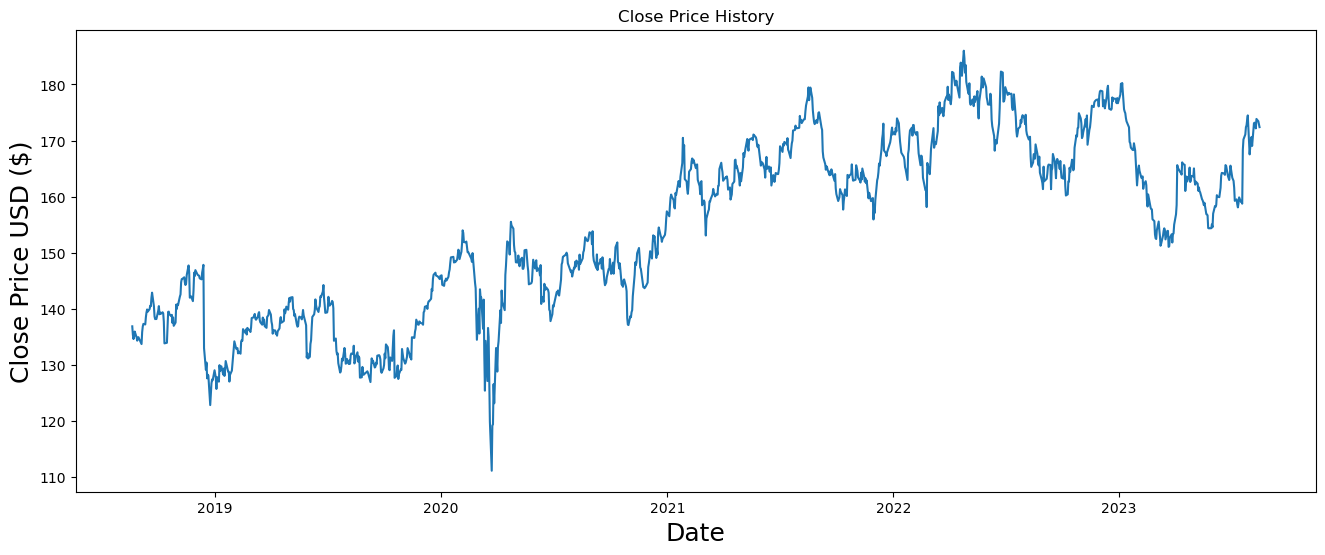

In [29]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(JNJ['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel ('Close Price USD ($)', fontsize = 18)
plt.show()

In [30]:
#Extracting the 'Close' column
close_prices = JNJ['Close'].values

In [42]:
data = JNJ.filter(['Close'])

In [44]:
#Convert the dataframe to numpy array
dataset=data.values

In [45]:
#Get the nuber of rows to trai model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

In [46]:
training_data_len

1194

In [47]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.34379601],
       [0.3233606 ],
       [0.31347673],
       ...,
       [0.83210908],
       [0.82543084],
       [0.81808473]])

In [48]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

In [49]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.34379601, 0.3233606 , 0.31347673, 0.32015497, 0.33137437,
       0.31761721, 0.30960344, 0.31681585, 0.31801789, 0.31454527,
       0.30158947, 0.33017234, 0.34366231, 0.34967289, 0.34820367,
       0.36556694, 0.37692004, 0.38399896, 0.37865644, 0.38493401,
       0.39268059, 0.39161225, 0.41191396, 0.42393492, 0.39174574,
       0.36730335, 0.36089229, 0.36169365, 0.36102579, 0.3813277 ,
       0.39187923, 0.37251237, 0.37678654, 0.37344742, 0.37732071,
       0.37478295, 0.3551489 , 0.30319218, 0.30359286, 0.3046614 ,
       0.33952184, 0.37825577, 0.37878994, 0.37277956, 0.36783752,
       0.37117664, 0.35167629, 0.36503277, 0.34499804, 0.35274483,
       0.39548554, 0.38533469, 0.39642059, 0.39455049, 0.41485241,
       0.41979444, 0.44891148, 0.45625759, 0.45679176, 0.46053156])]
[0.4479764321292605]

[array([0.34379601, 0.3233606 , 0.31347673, 0.32015497, 0.33137437,
       0.31761721, 0.30960344, 0.31681585, 0.31801789, 0.31454527,
       0.30158947, 0.33017234, 0.343

In [50]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1134/1134 [==============================] - 29s 22ms/step - loss: 0.0043


In [52]:

# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 22ms/step


4.1591324961219

C:\Users\eman\AppData\Local\Temp\ipykernel_6804\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


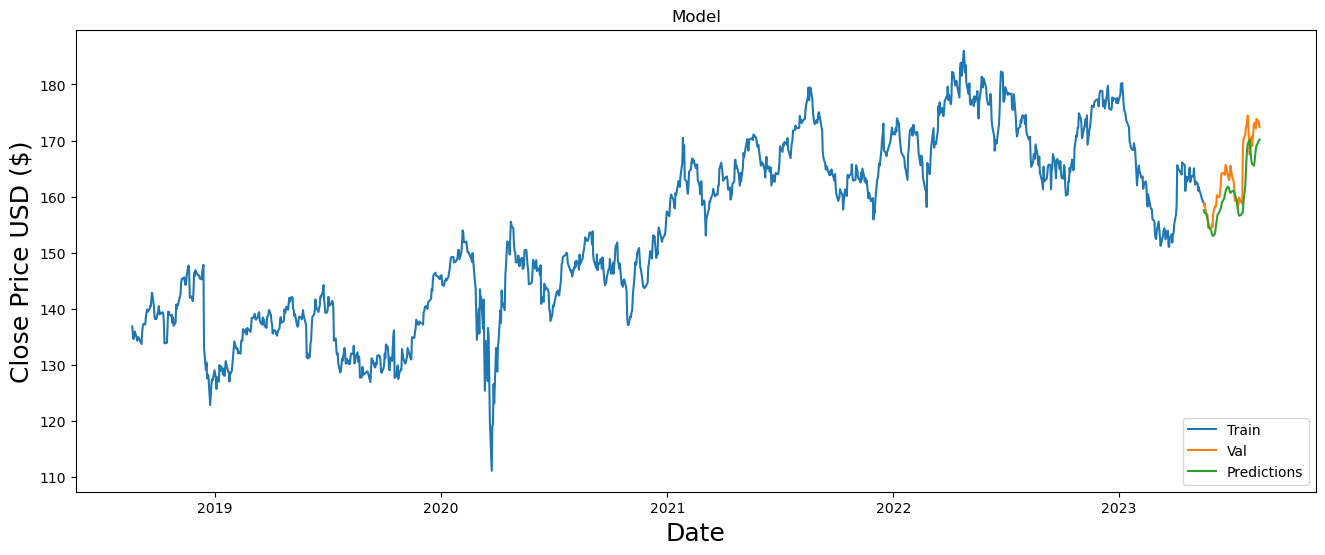

In [53]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [54]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-05-18,158.479996,157.569092
2023-05-19,158.910004,157.156113
2023-05-22,156.869995,156.930893
2023-05-23,156.809998,156.426193
2023-05-24,156.660004,155.902130
...,...,...
2023-08-10,172.169998,168.447861
2023-08-11,173.850006,169.056213
2023-08-14,173.440002,169.689636
